<style>
    @media print{
        body {
            position:relative !important;
        }
        .celltag_new_page {
            page-break-before: always !important;
        }
    }
</style>
# COMPSCI 371 Homework 6

Partners: Brian Janger, Matthew Wang, Caleb Watson

### Problem 0 (3 points)

## Part 1: Regularization in Logistic Regression Classification 

In [1]:
from urllib.request import urlretrieve
from os import path as osp


def retrieve(file_name, semester='fall22', course='371', homework=6):
    if osp.exists(file_name):
        print('Using previously downloaded file {}'.format(file_name))
    else:
        fmt = 'https://www2.cs.duke.edu/courses/{}/compsci{}/homework/{}/{}'
        url = fmt.format(semester, course, homework, file_name)
        urlretrieve(url, file_name)
        print('Downloaded file {}'.format(file_name))

In [2]:
import pickle

scalar_data_file = 'non_separable.pickle'
retrieve(scalar_data_file)
with open(scalar_data_file, 'rb') as file:
    scalar_data = pickle.load(file)
    
ad_data_file = 'ad.pickle'
retrieve(ad_data_file)
with open(ad_data_file, 'rb') as file:
    ad_data = pickle.load(file)

Using previously downloaded file non_separable.pickle
Using previously downloaded file ad.pickle


In [3]:
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

### Problem 1.1

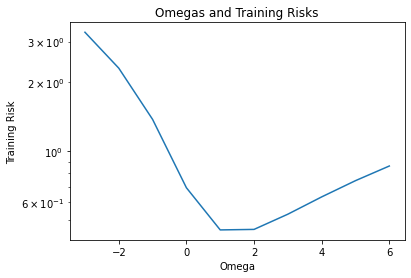

In [4]:
import numpy as np 

def alpha(beta, omega, x): 
    return beta + omega * x

def risk_function(x, y, omega):
    return np.log(1 + np.exp(-alpha(0, omega, x))) + (1 - y) * alpha(0, omega, x)

def plot_omegas_and_risks(data):
    omegas = np.linspace(-3, 6, 10)
    training_risks = []
    N = len(data['x'])

    for omega in omegas: 
        loss_sum = 0
        for i in range(0, N): 
            x = data['x'][i]
            y = data['y'][i]
            loss_sum += risk_function(x, y, omega)
        training_risks.append(loss_sum / N)

    plt.semilogy(omegas, training_risks)
    plt.title('Omegas and Training Risks')
    plt.xlabel('Omega')
    plt.ylabel('Training Risk')
    plt.show()

plot_omegas_and_risks(scalar_data)
    

### Problem 1.2

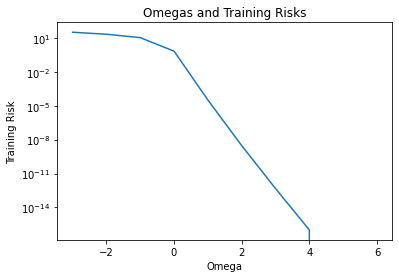

In [5]:
import copy 

seperable_data = copy.deepcopy(scalar_data)
for i in range(0, len(seperable_data['x'])):
    if seperable_data['y'][i] == 1: 
        seperable_data['x'][i] += 10
    else:
        seperable_data['x'][i] -= 10
        
plot_omegas_and_risks(seperable_data)

### Problem 1.3

In [6]:
from sklearn.linear_model import LogisticRegression


def train_and_test(data, cs=10000, folds=None, max_iter=10000):
    h = LogisticRegression(C=cs, max_iter=max_iter)
    h.fit(data['train']['x'], data['train']['y'])
    for dataset in ('train', 'test'):
        accuracy = h.score(data[dataset]['x'], data[dataset]['y'])
        print('{} empirical_accuracy is {:.2f} percent'.format(dataset, accuracy * 100))
    return h

In [7]:
lrc = train_and_test(ad_data)

train empirical_accuracy is 99.41 percent
test empirical_accuracy is 95.00 percent


In [8]:
# c_candidates = np.logspace(-3, 6, num=10)
# lrc = train_and_test(ad_data, c_candidates, folds=5)
# analyze_cv(lrc)

## Part 2: The Bootstrap

In [9]:
times_file = 'times.pickle'
retrieve(times_file)
with open(times_file, 'rb') as file:
    times = pickle.load(file)
n = len(times)

Using previously downloaded file times.pickle


In [10]:
m_hat = np.mean(times)
print('estimated wait time {:.4f} seconds'.format(m_hat))

estimated wait time 13.1083 seconds


### Problem 2.1

In [16]:
def bootstrap(data, sample_size=None, iterations=10000, replace=True):
    if sample_size is None: sample_size=len(data)
    means = []
    for i in range(1,iterations): #need to start at 0?
        if replace is True:        # selection with replacement
            means.append(np.mean(np.random.choice(data, size=sample_size, replace=True)))
        else:                   # selection without replacement
            means.append(np.mean(np.random.choice(data, size=sample_size, replace=False)))
    return np.mean(np.array(means)), np.std(np.array(means))


m_b, std_b = bootstrap(times)
print('Using the bootstrap method, the estimated mean wait time is {:.4f} seconds'.format(m_b)
      + ' and the standard deviation is {:.4f} seconds.'.format(std_b))

Using the bootstrap method, the estimated mean wait time is 13.1165 seconds and the standard deviation is 1.2402 seconds.


### Problem 2.2 (Exam Style)

When reporting the estimates from the bootstrap method to our boss, we would opt to use one decimal places. This is because both approaches, calculating the mean across all wait times and performing bootstrap, agree up to the tenths place (13.1 seconds).

### Problem 2.3

In [17]:
m_lambda = 12.5000
m_times = np.mean(times)
m_b = bootstrap(times)[0]

print('The true mean of p(t) is {:.4f} seconds.'.format(m_lambda))
print('The empirical average of the entire set times is {:.4f} seconds.'.format(m_times))
print('The empirical average computed by bootstrap is {:.4f} seconds.'.format(m_b))

The true mean of p(t) is 12.5000 seconds.
The empirical average of the entire set times is 13.1083 seconds.
The empirical average computed by bootstrap is 13.1102 seconds.


### Problem 2.4 (Exam Style)

The empirical averages are more similar to one another than the true mean of the exponential distribution p(t). This makes sense given the exponential distribution has a mean set to 12.5 seconds and the other two values are calculated on the same times array which used sample measurements as opposed to the underlying probability distribution.

### Problem 2.5

In [18]:
import math
sd_lambda = 12.5000
sd_times = np.std(times)
sd_p = 12.5000 / math.sqrt(n)
sd_b = bootstrap(times)[1]

print('The true standard deviation of p(t) is {:.4f} seconds.'.format(sd_lambda))
print('The empirical standard deviation of the entire set times is {:.4f} seconds.'.format(sd_times))
print('The true standard deviation of a sample of N numbers out of p(t) is {:.4f} seconds.'.format(sd_p))
print('The empirical standard deviation computed by bootstrap is {:.4f} seconds.'.format(sd_b))

The true standard deviation of p(t) is 12.5000 seconds.
The empirical standard deviation of the entire set times is 12.4875 seconds.
The true standard deviation of a sample of N numbers out of p(t) is 1.2500 seconds.
The empirical standard deviation computed by bootstrap is 1.2355 seconds.


### Problem 2.6

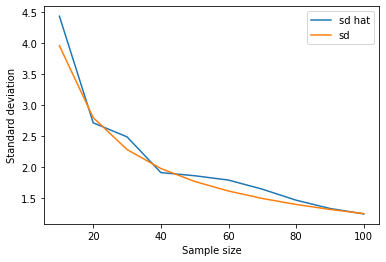

In [19]:
sample_size = [i for i in range(10, 110, 10)]
sd_hat = []
sd = []
for k in sample_size:    
    sd_hat.append(bootstrap(times[0:k], replace=True)[1])
    sd.append(12.5/math.sqrt(k))

def plot(x, y, labels):
    for value in range(len(y)):
        plt.plot(x, y[value], label=labels[value])
    plt.xlabel('Sample size')
    plt.ylabel('Standard deviation')
    plt.legend()
    
plot(sample_size, [sd_hat, sd], ['sd hat', 'sd'])

### Problem 2.7 (Exam Style Except for the Code)

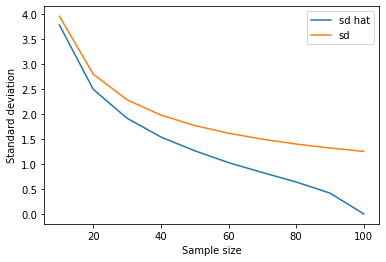

In [20]:
sd_hat = []
for k in sample_size: 
    sd_hat.append(bootstrap(times, sample_size=k, replace=False)[1])
plot(sample_size, [sd_hat, sd], ['sd hat', 'sd'])

As the results above show, the bootstrap continues to underestimate the true value for the standard deviation more and more as k increases from 10 to 100 samples. 